<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_time_series/blob/master/matrix_5_day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fbprophet
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error as mea
from fbprophet import Prophet

In [2]:
# should be '0.6'
fbprophet.__version__


'0.6'

In [3]:
# should be '2.19.1.1'
pystan.__version__

'2.19.1.1'

In [6]:
path3= 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(path3)
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [0]:
df['date']=pd.to_datetime(df[['year', 'month' , 'day']])

In [8]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16


Fix data

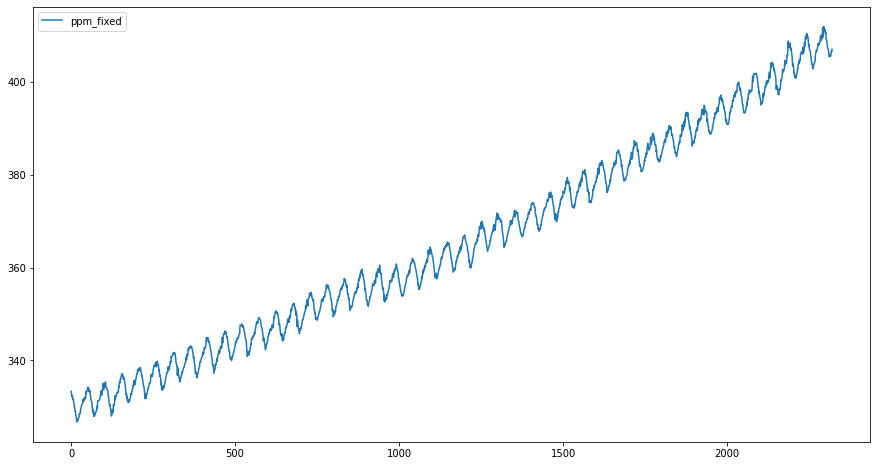

In [9]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x)
df['ppm_fixed'].fillna(method ='backfill', inplace = True)
df[['ppm_fixed']].plot(figsize =(15,8))

Divide to train and test

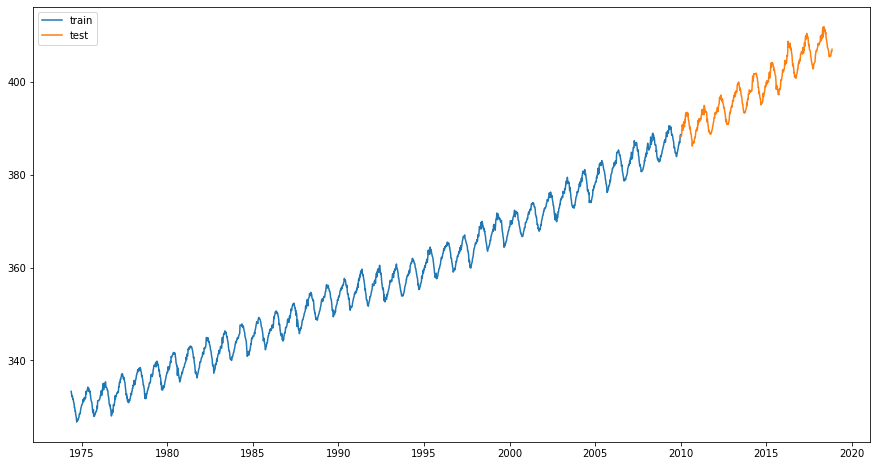

In [14]:
train = df[df.year < 2010]
test = df[df.year >= 2010]
plt.figure(figsize = (15,8))
plt.plot(train.date, train['ppm_fixed'], label ='train');
plt.plot(test.date, test['ppm_fixed'],  label ='test');
plt.legend();

Prophet

In [17]:
fb_df = train[['date', 'ppm_fixed']].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [18]:
m=Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods=len(test), freq = 'W', include_history=False)
future.tail()

,ds
457,2018-10-07
458,2018-10-14
459,2018-10-21
460,2018-10-28
461,2018-11-04


In [24]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,388.641156,387.905236,389.040698,388.641156,388.641156,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,0.0,0.0,0.0,388.468252
1,2010-01-10,388.679144,388.176983,389.183703,388.679144,388.679144,0.020884,0.020884,0.020884,0.020884,0.020884,0.020884,0.0,0.0,0.0,388.700029
2,2010-01-17,388.717133,388.404642,389.434125,388.717133,388.717133,0.204730,0.204730,0.204730,0.204730,0.204730,0.204730,0.0,0.0,0.0,388.921863
3,2010-01-24,388.755121,388.602980,389.628201,388.755121,388.755121,0.366814,0.366814,0.366814,0.366814,0.366814,0.366814,0.0,0.0,0.0,389.121935
4,2010-01-31,388.793109,388.769714,389.799740,388.793109,388.793109,0.503869,0.503869,0.503869,0.503869,0.503869,0.503869,0.0,0.0,0.0,389.296978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2018-10-07,406.001821,389.718893,415.982695,393.166308,419.590908,-3.487006,-3.487006,-3.487006,-3.487006,-3.487006,-3.487006,0.0,0.0,0.0,402.514815
458,2018-10-14,406.039809,389.762728,416.429400,393.172299,419.676492,-3.312991,-3.312991,-3.312991,-3.312991,-3.312991,-3.312991,0.0,0.0,0.0,402.726818
459,2018-10-21,406.077798,390.015954,416.504259,393.164545,419.762076,-3.073719,-3.073719,-3.073719,-3.073719,-3.073719,-3.073719,0.0,0.0,0.0,403.004078
460,2018-10-28,406.115786,390.304510,416.975463,393.165478,419.847661,-2.790512,-2.790512,-2.790512,-2.790512,-2.790512,-2.790512,0.0,0.0,0.0,403.325274


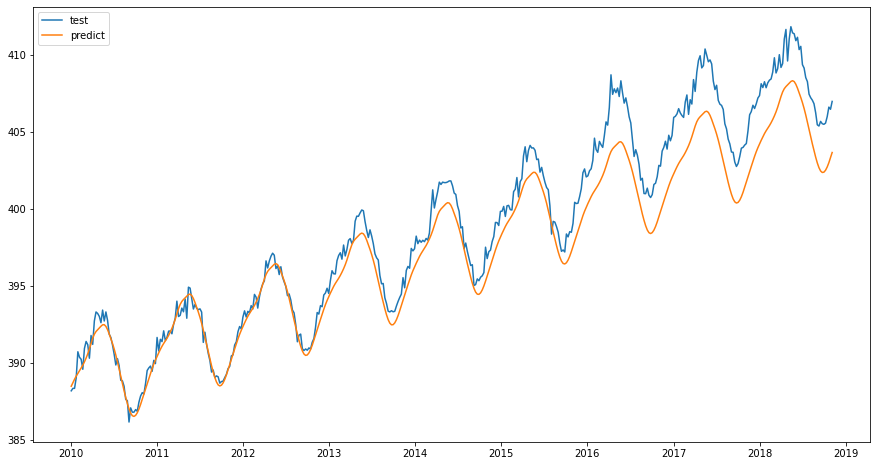

In [26]:

plt.figure(figsize = (15,8))
#plt.plot(train.date, train['ppm_fixed'], label ='train');
plt.plot(test.date, test['ppm_fixed'],  label ='test');
plt.plot(test.date, forecast['yhat'],  label ='predict');
plt.legend();

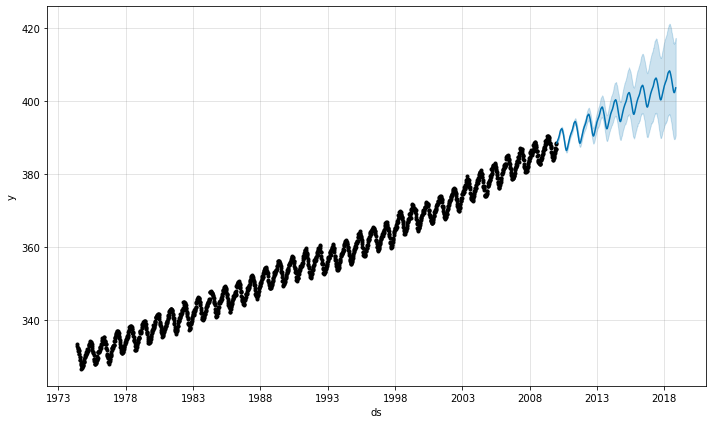

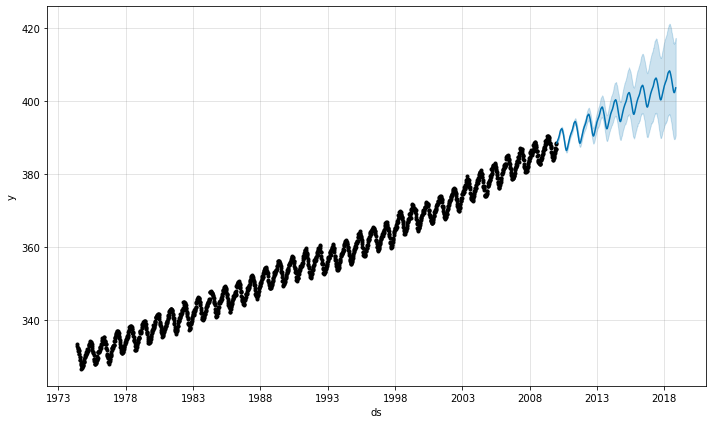

In [27]:
m.plot(forecast)